In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
crowdedness = ctrl.Antecedent(np.arange(0, 50, 1), 'crowdedness')
people_speed = ctrl.Antecedent(np.arange(0, 20, 1), 'people_speed')
hastiness = ctrl.Antecedent(np.arange(0, 10, 1), 'hastiness')

robot_speed = ctrl.Consequent(np.arange(0, 100, 1), 'robot_speed')

In [3]:
crowdedness['low'] = fuzz.trimf(crowdedness.universe, [0, 0, 20])
crowdedness['medium'] = fuzz.trapmf(crowdedness.universe, [15, 20, 40, 45])
crowdedness['high'] = fuzz.trimf(crowdedness.universe, [40, 50, 50])

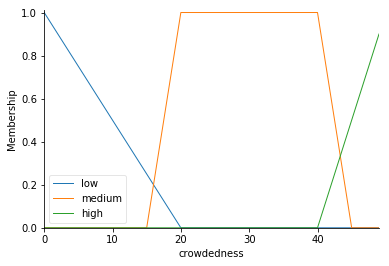

In [5]:
crowdedness.view()

In [6]:
people_speed['low'] = fuzz.trimf(people_speed.universe, [0, 0, 8])
people_speed['medium'] = fuzz.trapmf(people_speed.universe, [6, 8, 16, 18])
people_speed['high'] = fuzz.trimf(people_speed.universe, [16, 20, 20])

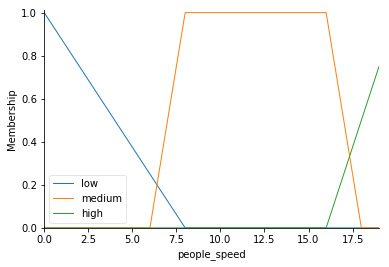

In [7]:
people_speed.view()

In [8]:
hastiness['low'] = fuzz.trimf(hastiness.universe, [0, 0, 4])
hastiness['medium'] = fuzz.trimf(hastiness.universe, [3, 5.5, 8])
hastiness['high'] = fuzz.trimf(hastiness.universe, [6, 10, 10])

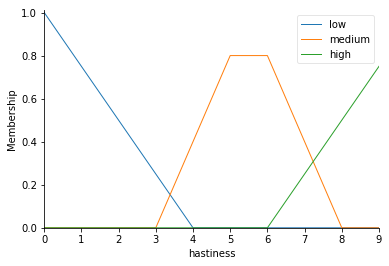

In [9]:
hastiness.view()

In [11]:
robot_speed['low'] = fuzz.trimf(robot_speed.universe, [0, 0, 40])
robot_speed['medium'] = fuzz.trimf(robot_speed.universe, [30, 55, 80])
robot_speed['high'] = fuzz.trimf(robot_speed.universe, [60, 100, 100])

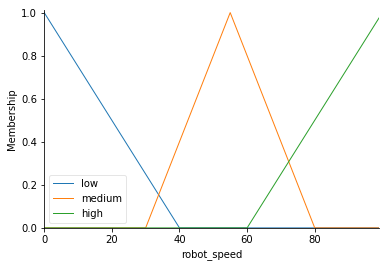

In [12]:
robot_speed.view()

In [ ]:
medium

Rules

In [17]:
rule1a1 = ctrl.Rule(crowdedness['low'] | people_speed['low'] | hastiness['low'], robot_speed['medium'])
rule1a2 = ctrl.Rule(crowdedness['low'] | people_speed['medium'] | hastiness['low'], robot_speed['medium'])
rule1a3 = ctrl.Rule(crowdedness['low'] | people_speed['medium'] | hastiness['medium'], robot_speed['medium'])
rule1a4 = ctrl.Rule(crowdedness['low'] | people_speed['low'] | hastiness['medium'], robot_speed['high'])
rule1a5 = ctrl.Rule(crowdedness['low'] | people_speed['high'] | hastiness['high'], robot_speed['high'])
rule1a6 = ctrl.Rule(crowdedness['low'] | people_speed['low'] | hastiness['high'], robot_speed['high'])
rule1a7 = ctrl.Rule(crowdedness['low'] | people_speed['high'] | hastiness['low'], robot_speed['low'])
rule1a8 = ctrl.Rule(crowdedness['low'] | people_speed['high'] | hastiness['medium'], robot_speed['medium'])
rule1a9 = ctrl.Rule(crowdedness['low'] | people_speed['medium'] | hastiness['high'], robot_speed['high'])

rule1b1 = ctrl.Rule(crowdedness['medium'] | people_speed['low'] | hastiness['low'], robot_speed['medium'])
rule1b2 = ctrl.Rule(crowdedness['medium'] | people_speed['medium'] | hastiness['low'], robot_speed['low'])
rule1b3 = ctrl.Rule(crowdedness['medium'] | people_speed['medium'] | hastiness['medium'], robot_speed['medium'])
rule1b4 = ctrl.Rule(crowdedness['medium'] | people_speed['low'] | hastiness['medium'], robot_speed['high'])
rule1b5 = ctrl.Rule(crowdedness['medium'] | people_speed['high'] | hastiness['high'], robot_speed['medium'])
rule1b6 = ctrl.Rule(crowdedness['medium'] | people_speed['low'] | hastiness['high'], robot_speed['high'])
rule1b7 = ctrl.Rule(crowdedness['medium'] | people_speed['high'] | hastiness['low'], robot_speed['low'])
rule1b8 = ctrl.Rule(crowdedness['medium'] | people_speed['high'] | hastiness['medium'], robot_speed['medium'])
rule1b9 = ctrl.Rule(crowdedness['medium'] | people_speed['medium'] | hastiness['high'], robot_speed['high'])

rule1c1 = ctrl.Rule(crowdedness['high'] | people_speed['low'] | hastiness['low'], robot_speed['medium'])
rule1c2 = ctrl.Rule(crowdedness['high'] | people_speed['medium'] | hastiness['low'], robot_speed['low'])
rule1c3 = ctrl.Rule(crowdedness['high'] | people_speed['medium'] | hastiness['medium'], robot_speed['medium'])
rule1c4 = ctrl.Rule(crowdedness['high'] | people_speed['low'] | hastiness['medium'], robot_speed['medium'])
rule1c5 = ctrl.Rule(crowdedness['high'] | people_speed['high'] | hastiness['high'], robot_speed['low'])
rule1c6 = ctrl.Rule(crowdedness['high'] | people_speed['low'] | hastiness['high'], robot_speed['medium'])
rule1c7 = ctrl.Rule(crowdedness['high'] | people_speed['high'] | hastiness['low'], robot_speed['low'])
rule1c8 = ctrl.Rule(crowdedness['high'] | people_speed['high'] | hastiness['medium'], robot_speed['low'])
rule1c9 = ctrl.Rule(crowdedness['high'] | people_speed['medium'] | hastiness['high'], robot_speed['medium'])


In [19]:
robot_speed_ctrl = ctrl.ControlSystem(
    [rule1a1, rule1a2, rule1a3, rule1a4, rule1a5, rule1a6, rule1a7, rule1a8, rule1a9,
    rule1b1, rule1b2, rule1b3, rule1b4, rule1b5, rule1b6, rule1b7, rule1b8, rule1b9,
     rule1c1, rule1c2, rule1c3, rule1c4, rule1c5, rule1c6, rule1c7, rule1c8, rule1c9])
speed = ctrl.ControlSystemSimulation(robot_speed_ctrl)

In [20]:
x = input()

 10


In [21]:
y = input()


 10


In [22]:
z = input()


 10


In [23]:
speed.input['crowdedness'] = int(x)
speed.input['people_speed'] = int(y)
speed.input['hastiness'] = int(z)

50.4010081287303


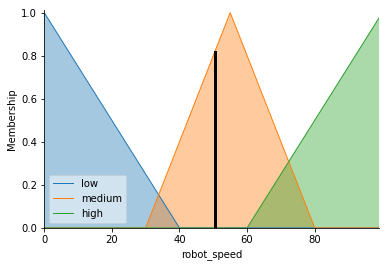

In [29]:
speed.compute()
print(speed.output['robot_speed'])
robot_speed.view(sim=speed)